In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def myODE(t, y, p, I):
    y1, y2, y3 = y
    k1, k2, k3 = p

    dy1dt = k1 * I - k1 * y1
    dy2dt = k2 * y1 - k2 * y2
    dy3dt = k3 * y2 - k3 * y3

    return [dy1dt, dy2dt, dy3dt]

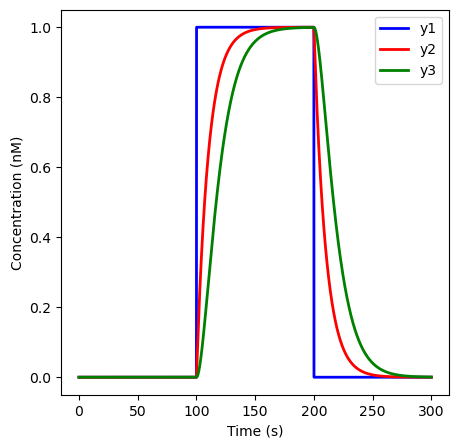

In [38]:
k1 = 1e2
k2 = 1e-1
k3 = 1e-1

initial = [0, 0, 0]
I_arr = [0, 1, 0]
t_initial = 0
t_span_per_step = 100

y_out_arr = []
t_out_arr = []

for I in I_arr:
    t_span = [t_initial, t_initial + t_span_per_step]
    t_initial = t_initial + t_span_per_step
    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    sol = solve_ivp(myODE, t_span, initial, args=([k1, k2, k3], I), t_eval=t_eval, method='BDF', rtol=1e-9, atol=1e-9)
    initial = sol.y[:, -1]

    y_out_arr.append(sol.y)
    t_out_arr.append(sol.t)

y_out_arr = np.concatenate(y_out_arr, axis=1)
t_out_arr = np.concatenate(t_out_arr, axis=0)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(t_out_arr, y_out_arr[0, :], label='y1', color='blue', linewidth=2)
ax.plot(t_out_arr, y_out_arr[1, :], label='y2', color='red', linewidth=2)
ax.plot(t_out_arr, y_out_arr[2, :], label='y3', color='green', linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Concentration (nM)')
ax.legend()

In [53]:
def myODE(t, y, p, I):
    y1, y2, y3 = y
    k1, k2, k3 = p

    dy1dt = k1 * (I - y1)
    dy2dt = k2 * (y1 - y2)
    dy3dt = k3 * np.max(((y2 - y3), 0)) - k3 * 0.01 * np.max(((y3 - y2), 0))

    return [dy1dt, dy2dt, dy3dt]

k1 = 1e-1
k2 = 1e-1
k3 = 1e-0

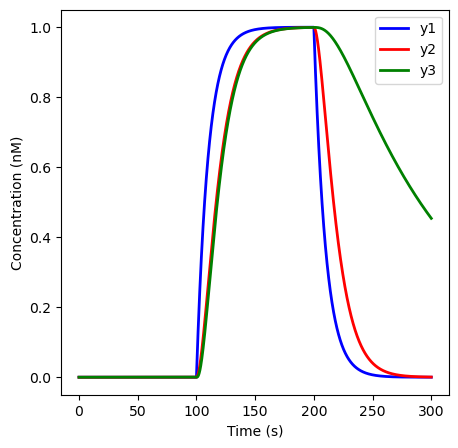

In [54]:
initial = [0, 0, 0]
I_arr = [0, 1, 0]
t_initial = 0
t_span_per_step = 100

y_out_arr = []
t_out_arr = []

for I in I_arr:
    t_span = [t_initial, t_initial + t_span_per_step]
    t_initial = t_initial + t_span_per_step
    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    sol = solve_ivp(myODE, t_span, initial, args=([k1, k2, k3], I), t_eval=t_eval, method='BDF', rtol=1e-12, atol=1e-12)
    initial = sol.y[:, -1]

    y_out_arr.append(sol.y)
    t_out_arr.append(sol.t)

y_out_arr = np.concatenate(y_out_arr, axis=1)
t_out_arr = np.concatenate(t_out_arr, axis=0)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(t_out_arr, y_out_arr[0, :], label='y1', color='blue', linewidth=2)
ax.plot(t_out_arr, y_out_arr[1, :], label='y2', color='red', linewidth=2)
ax.plot(t_out_arr, y_out_arr[2, :], label='y3', color='green', linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Concentration (nM)')
ax.legend()

In [79]:
def myODE(t, y, p, I):
    y1, y2, y3 = y
    k1, k2, k3, n3, K3 = p

    dy1dt = k1 * (I - y1)
    dy2dt = k2 * (y1 - y2)
    y2y3dif = np.max(((y2 - y3), 0))
    # dy3dt = k3 * (y2y3dif**n3) * (1 + K3**n3) / ((K3**n3) + (y2y3dif**n3)) - k3 * 0.001 * np.max(((y3 - y2), 0))
    dy3dt = k3 * (y2**n3) * (1 + K3**n3) / ((K3**n3) + (y2**n3)) - k3 * y3

    return [dy1dt, dy2dt, dy3dt]

k1 = 1e-1
k2 = 1e-1
k3 = 1 / 10
K3 = 0.5
n3 = 4

p = [k1, k2, k3, n3, K3]

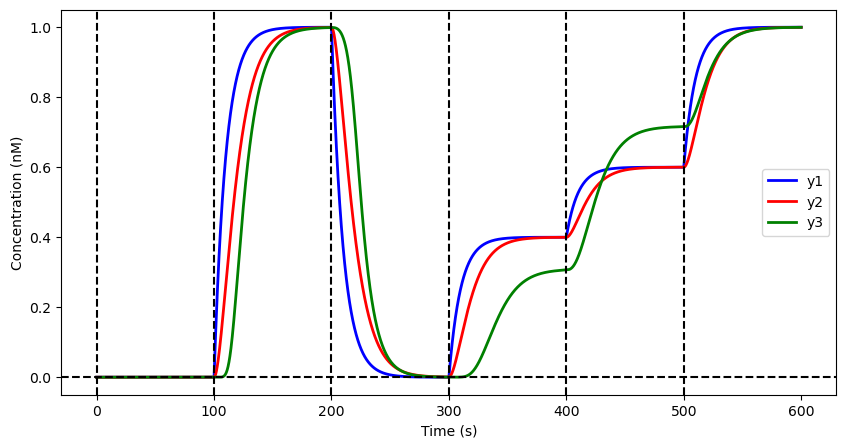

In [83]:
initial = [0, 0, 0]
I_arr = [0, 1, 0, 0.4, 0.6, 1]
t_initial = 0
t_span_per_step = 100

y_out_arr = []
t_out_arr = []

for I in I_arr:
    t_span = [t_initial, t_initial + t_span_per_step]
    t_initial = t_initial + t_span_per_step
    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    sol = solve_ivp(myODE, t_span, initial, args=(p, I), t_eval=t_eval, method='BDF', rtol=1e-12, atol=1e-12)
    initial = sol.y[:, -1]

    y_out_arr.append(sol.y)
    t_out_arr.append(sol.t)

y_out_arr = np.concatenate(y_out_arr, axis=1)
t_out_arr = np.concatenate(t_out_arr, axis=0)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(t_out_arr, y_out_arr[0, :], label='y1', color='blue', linewidth=2)
ax.plot(t_out_arr, y_out_arr[1, :], label='y2', color='red', linewidth=2)
ax.plot(t_out_arr, y_out_arr[2, :], label='y3', color='green', linewidth=2)
t_hline = 0
ax.axhline(t_hline, color='black', linestyle='--')
for i in range(len(I_arr)):
    ax.axvline(i * t_span_per_step, color='black', linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Concentration (nM)')
ax.legend()

In [ ]:
def secondORder(t, y, p, I):
    y1, y2 = y
    k, m, b = p

    dy1dt = y2
    dy2dt = -(1/m) * (b*y2 + k*y1) + I

    return [dy1dt, dy2dt]

k = 1
m = 1
b = 1

p = [k, m, b]

In [ ]:
initial = [0, 0, 0]
I_arr = [0, 1, 0]
t_initial = 0
t_span_per_step = 100

y_out_arr = []
t_out_arr = []

for I in I_arr:
    t_span = [t_initial, t_initial + t_span_per_step]
    t_initial = t_initial + t_span_per_step
    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    sol = solve_ivp(myODE, t_span, initial, args=([k1, k2, k3], I), t_eval=t_eval, method='BDF', rtol=1e-12, atol=1e-12)
    initial = sol.y[:, -1]

    y_out_arr.append(sol.y)
    t_out_arr.append(sol.t)

y_out_arr = np.concatenate(y_out_arr, axis=1)
t_out_arr = np.concatenate(t_out_arr, axis=0)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(t_out_arr, y_out_arr[0, :], label='y1', color='blue', linewidth=2)
ax.plot(t_out_arr, y_out_arr[1, :], label='y2', color='red', linewidth=2)
ax.plot(t_out_arr, y_out_arr[2, :], label='y3', color='green', linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Concentration (nM)')
ax.legend()